In [1]:
import numpy as np
from scipy import signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('figure', figsize=(10, 3))
import math
from IPython.display import Audio
from IPython.display import display, Markdown

In [2]:
sourceFilesPrefix="SamplesFromPaper//s"
rate1, sample1_data = scipy.io.wavfile.read(sourceFilesPrefix+"1.wav")
rate2, sample2_data = scipy.io.wavfile.read(sourceFilesPrefix+"2.wav")
rate3, sample3_data = scipy.io.wavfile.read(sourceFilesPrefix+"3.wav")
rate4, sample4_data = scipy.io.wavfile.read(sourceFilesPrefix+"4.wav")
rate5, sample5_data = scipy.io.wavfile.read(sourceFilesPrefix+"5.wav")

In [3]:
def sigmoid(y):
    g=np.divide(1,np.add(1,np.exp(-y)))
    return g

def gradient(eta, Y, W):
    delW=np.zeros(W.shape)
    Z=sigmoid(Y)
    Id=np.identity(Y.shape[0])
    grad=eta*(Id+np.dot((1-2*Z),Y.T))*W
    return grad

# First input signal \( vacuum cleaner \)

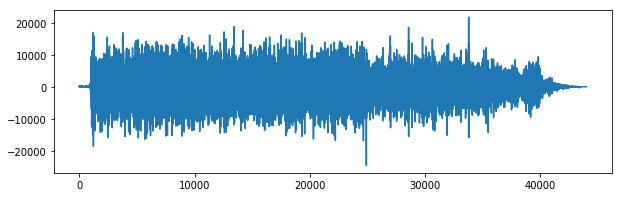

In [4]:
display(Markdown("# First input signal \( vacuum cleaner \)"))
plt.figure(1)
plt.plot(sample2_data)
plt.show()
Audio(data=sample2_data, rate=16000)

# Second input signal \( clapping \)

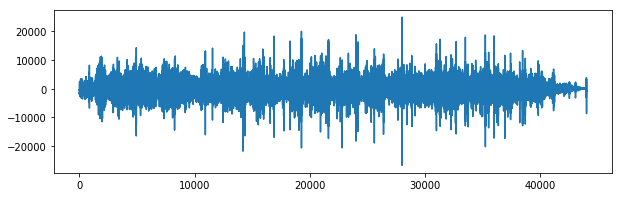

In [5]:
display(Markdown("# Second input signal \( clapping \)"))
plt.figure(1)
plt.plot(sample3_data)
plt.show()
Audio(data=sample3_data, rate=16000)

# Third input signal \( human voice \)

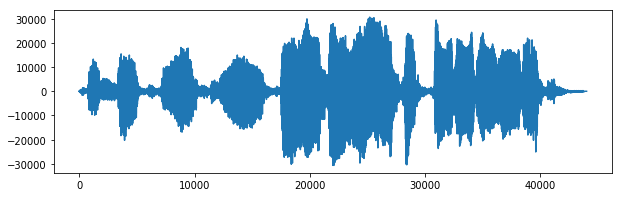

In [6]:
display(Markdown("# Third input signal \( human voice \)"))
plt.figure(1)
plt.plot(sample1_data)
plt.show()
Audio(data=sample1_data, rate=16000)

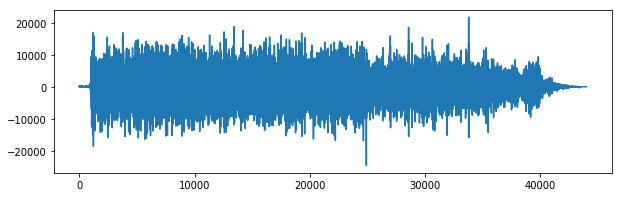

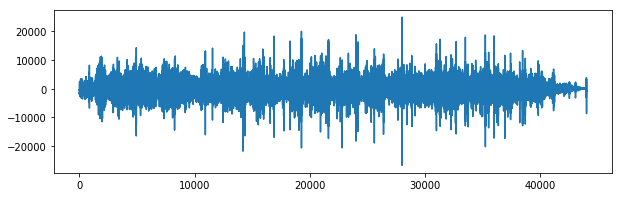

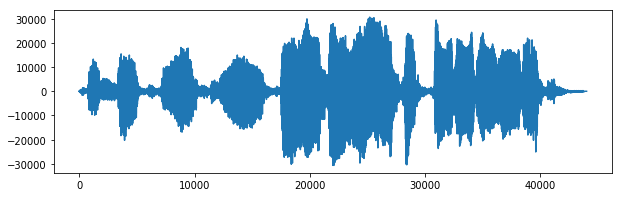

In [7]:
plt.figure(1)
plt.plot(sample2_data)
plt.show()
plt.figure(1)
plt.plot(sample3_data)
plt.show()
plt.figure(1)
plt.plot(sample1_data)
plt.show()

In [7]:
# Whiten the data
med2=sample2_data.std(axis=0)
s2data=sample2_data/med2
med3=sample3_data.std(axis=0)
s3data=sample3_data/med3
med1=sample1_data.std(axis=0)
s1data=sample1_data/med1

orig=np.matrix([s2data,s3data,s1data])
n=len(orig)
A=np.random.random([n,n])
A=np.matrix([[0.77191,0.47520,0.58699],
             [0.33712,0.47563,0.20836],
             [0.96878,0.57618,0.65625]])
print("Mixing matrix: \n"+str(A))
X=np.dot(A,orig)
print("Correlation matrix: \n"+str(np.corrcoef(X)))

Mixing matrix: 
[[ 0.77191  0.4752   0.58699]
 [ 0.33712  0.47563  0.20836]
 [ 0.96878  0.57618  0.65625]]
Correlation matrix: 
[[ 1.          0.90992555  0.99877884]
 [ 0.90992555  1.          0.9129487 ]
 [ 0.99877884  0.9129487   1.        ]]


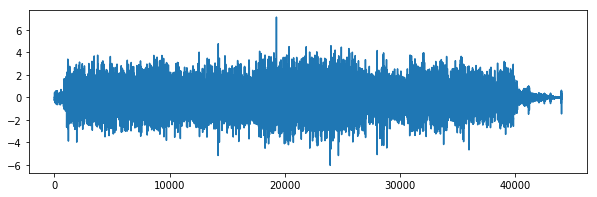

In [8]:
plt.figure(1)
plt.plot(X[0].T)
plt.show()
Audio(data=X[0], rate=16000)

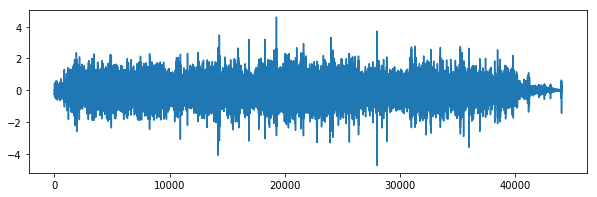

In [9]:
plt.figure(2)
plt.plot(X[1].T)
plt.show()
Audio(data=X[1], rate=16000)

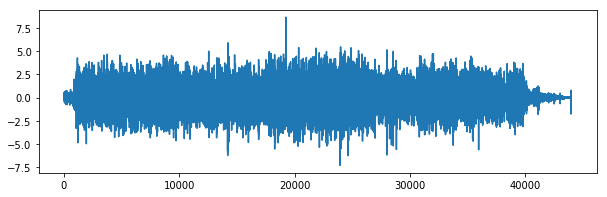

In [10]:
plt.figure(3)
plt.plot(X[2].T)
plt.show()
Audio(data=X[2], rate=16000)

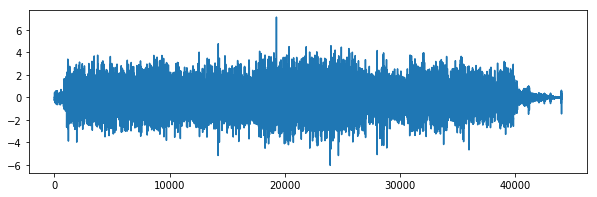

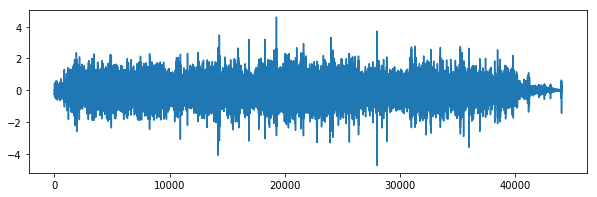

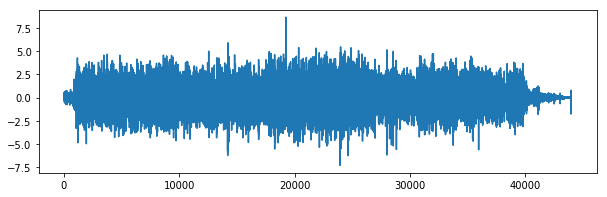

In [16]:
plt.figure(1)
plt.plot(X[0].T)
plt.show()
plt.figure(1)
plt.plot(X[1].T)
plt.show()
plt.figure(1)
plt.plot(X[2].T)
plt.show()

In [11]:
corr12=1
corr13=1
corr23=1
while (abs(corr12)>=3e-6 or abs(corr13)>=3e-6) or abs(corr23)>=3e-6:
    eta=0.01
    eta0=eta
    T=1000
    num_iter=10000

    W=np.random.uniform(0.001,0.01,(n,n))
    print("Initial guessed decomposition matrix: \n"+str(W))
    for i in range(0,num_iter):
        Y=np.dot(W,X)
        delW=gradient(eta,Y,W)
        W+=delW
        eta=eta0/(1+(i/T))
    Y2=np.dot(W,X)
    corr=np.corrcoef(Y2)
    print('Correlation coefficient: \n',corr)
    corr12=corr[1][0]
    corr13=corr[2][0]
    corr23=corr[2][1]

Initial guessed decomposition matrix: 
[[ 0.00975471  0.00860058  0.00217355]
 [ 0.00980786  0.00960168  0.00777141]
 [ 0.00310797  0.00295689  0.00544271]]
Correlation coefficient: 
 [[  1.00000000e+00  -2.46235860e-06  -2.91778297e-05]
 [ -2.46235860e-06   1.00000000e+00  -3.87257386e-06]
 [ -2.91778297e-05  -3.87257386e-06   1.00000000e+00]]
Initial guessed decomposition matrix: 
[[ 0.00723639  0.00569528  0.00466211]
 [ 0.00995116  0.00478256  0.00897904]
 [ 0.00924807  0.00738099  0.00859959]]
Correlation coefficient: 
 [[  1.00000000e+00  -2.82907640e-05   5.36041128e-06]
 [ -2.82907640e-05   1.00000000e+00   2.42486391e-06]
 [  5.36041128e-06   2.42486391e-06   1.00000000e+00]]
Initial guessed decomposition matrix: 
[[ 0.0041566   0.00870108  0.0085496 ]
 [ 0.00727316  0.00830743  0.00551853]
 [ 0.00502615  0.00150229  0.00386855]]
Correlation coefficient: 
 [[  1.00000000e+00   4.26180757e-06   9.85515079e-07]
 [  4.26180757e-06   1.00000000e+00  -2.45195307e-05]
 [  9.85515079

Correlation coefficient: 
 [[  1.00000000e+00  -2.33068420e-05  -1.57091135e-06]
 [ -2.33068420e-05   1.00000000e+00  -5.76718640e-06]
 [ -1.57091135e-06  -5.76718640e-06   1.00000000e+00]]
Initial guessed decomposition matrix: 
[[ 0.00426362  0.00734141  0.00260895]
 [ 0.00725525  0.0059868   0.00613831]
 [ 0.00328893  0.00371928  0.00615797]]
Correlation coefficient: 
 [[  1.00000000e+00  -5.11182181e-06   2.04146931e-07]
 [ -5.11182181e-06   1.00000000e+00   6.56325597e-06]
 [  2.04146931e-07   6.56325597e-06   1.00000000e+00]]
Initial guessed decomposition matrix: 
[[ 0.00378898  0.00942778  0.0076044 ]
 [ 0.00480692  0.006135    0.00358048]
 [ 0.0075099   0.00503732  0.00918532]]
Correlation coefficient: 
 [[  1.00000000e+00   6.04806533e-06   2.06249608e-06]
 [  6.04806533e-06   1.00000000e+00  -2.67814377e-05]
 [  2.06249608e-06  -2.67814377e-05   1.00000000e+00]]
Initial guessed decomposition matrix: 
[[ 0.00499528  0.0024231   0.00982002]
 [ 0.00858718  0.00459526  0.00839003]

Correlation coefficient: 
 [[  1.00000000e+00  -2.21000827e-05   4.84981269e-06]
 [ -2.21000827e-05   1.00000000e+00   4.66637159e-06]
 [  4.84981269e-06   4.66637159e-06   1.00000000e+00]]
Initial guessed decomposition matrix: 
[[ 0.0025529   0.00836974  0.0055248 ]
 [ 0.00346296  0.00369844  0.00949154]
 [ 0.00549841  0.00692567  0.00628733]]
Correlation coefficient: 
 [[  1.00000000e+00   6.41323617e-07   7.47708358e-06]
 [  6.41323617e-07   1.00000000e+00  -1.42896478e-05]
 [  7.47708358e-06  -1.42896478e-05   1.00000000e+00]]
Initial guessed decomposition matrix: 
[[ 0.00892294  0.00305211  0.00208671]
 [ 0.00422507  0.00666225  0.00882357]
 [ 0.00196668  0.00711699  0.0074374 ]]
Correlation coefficient: 
 [[  1.00000000e+00  -3.11627714e-06  -2.08835359e-05]
 [ -3.11627714e-06   1.00000000e+00  -8.60081607e-07]
 [ -2.08835359e-05  -8.60081607e-07   1.00000000e+00]]
Initial guessed decomposition matrix: 
[[ 0.00706375  0.00792135  0.00527313]
 [ 0.00553687  0.00128874  0.00875379]

In [12]:
print("Final decomposition matrix: \n",W)
Y2=np.dot(W,X)

Final decomposition matrix: 
 [[-0.09092821 -0.00835636  0.0822027 ]
 [-0.00811929  0.02537429 -0.00280462]
 [ 0.08864322 -0.0026005  -0.06854625]]


# First recoverd signal

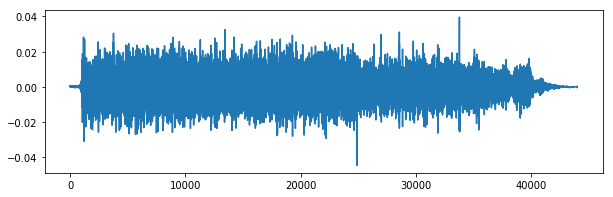

In [13]:
display(Markdown("# First recoverd signal"))
plt.figure(1)
plt.plot(Y2[0].T)
plt.show()
Audio(data=Y2[0], rate=16000)

# Second recoverd signal

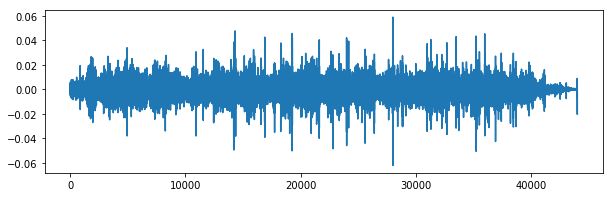

In [14]:
display(Markdown("# Second recoverd signal"))
plt.figure(1)
plt.plot(Y2[1].T)
plt.show()
Audio(data=Y2[1], rate=16000)

# Third recoverd signal

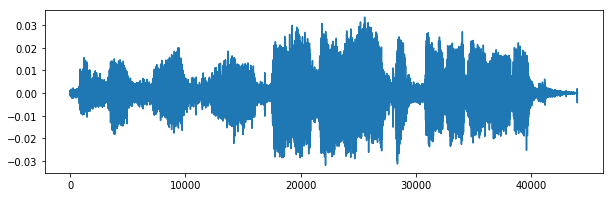

In [15]:
display(Markdown("# Third recoverd signal"))
plt.figure(1)
plt.plot(Y2[2].T)
plt.show()
Audio(data=Y2[2], rate=16000)

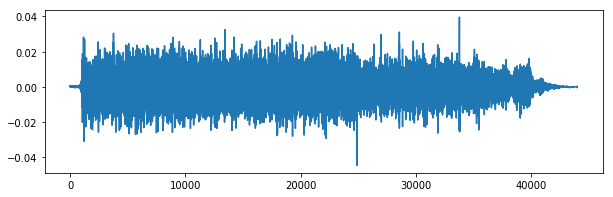

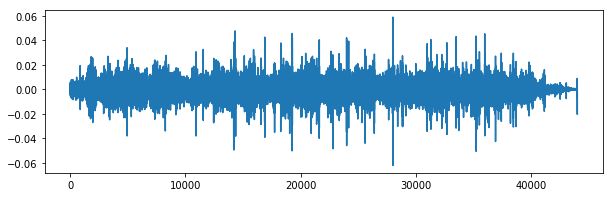

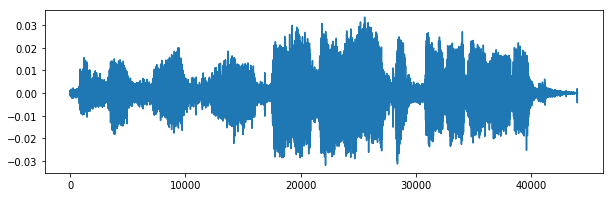

In [17]:
plt.figure(1)
plt.plot(Y2[0].T)
plt.show()
plt.figure(1)
plt.plot(Y2[1].T)
plt.show()
plt.figure(1)
plt.plot(Y2[2].T)
plt.show()